In [40]:
import os
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [44]:
data_folder = 'data'
stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

stock_data = {}

# 遍历每只股票
for stock in stocks:
    file_name = f"{stock}_15m_arima.csv"
    file_path = os.path.join(data_folder, file_name)

    df = pd.read_csv(file_path)

    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date')

    df_stock = df.set_index('date')

    stock_data[stock] = df_stock
    print(f"{stock} data loaded, total: {len(df)} rows")
    print("数据时间范围：", df.index.min(), "到", df.index.max())

AAPL data loaded, total: 1529 rows
数据时间范围： 0 到 1528
AMZN data loaded, total: 1529 rows
数据时间范围： 0 到 1528
GOOG data loaded, total: 1529 rows
数据时间范围： 0 到 1528
META data loaded, total: 1529 rows
数据时间范围： 0 到 1528
MSFT data loaded, total: 1529 rows
数据时间范围： 0 到 1528
NVDA data loaded, total: 1529 rows
数据时间范围： 0 到 1528
TSLA data loaded, total: 1529 rows
数据时间范围： 0 到 1528


In [48]:
log_diff_data = {}
train_val_data = {}

for stock, df_stock in stock_data.items():
    # 获取收盘价，计算对数
    close_series = df_stock['close'].dropna()
    close_log = np.log(close_series)

    # 计算对数差分
    close_log_diff = close_log.diff().dropna()

    log_diff_data[stock] = (close_log, close_log_diff)
    print(f"\n{stock} 对数数据样例:")
    print(close_log.head())
    print(f"{stock} 对数差分样例:")
    print(close_log_diff.head())

    # 分割训练集和验证集（90%/10%）
    train_size = int(len(close_log_diff) * 0.9)
    train_data = close_log_diff.iloc[:train_size]
    val_data = close_log_diff.iloc[train_size:]

    train_val_data[stock] = (train_data, val_data)
    print(f"{stock} 训练集样本数: {len(train_data)}")
    print(f"{stock} 验证集样本数: {len(val_data)}")


AAPL 对数数据样例:
date
2024-12-05 14:15:00    5.494213
2024-12-05 14:30:00    5.493390
2024-12-05 14:45:00    5.493535
2024-12-05 15:00:00    5.493020
2024-12-05 15:15:00    5.492674
Name: close, dtype: float64
AAPL 对数差分样例:
date
2024-12-05 14:30:00   -0.000823
2024-12-05 14:45:00    0.000144
2024-12-05 15:00:00   -0.000514
2024-12-05 15:15:00   -0.000347
2024-12-05 15:30:00    0.000100
Name: close, dtype: float64
AAPL 训练集样本数: 1375
AAPL 验证集样本数: 153

AMZN 对数数据样例:
date
2024-12-05 14:15:00    5.397982
2024-12-05 14:30:00    5.397484
2024-12-05 14:45:00    5.398208
2024-12-05 15:00:00    5.399813
2024-12-05 15:15:00    5.398253
Name: close, dtype: float64
AMZN 对数差分样例:
date
2024-12-05 14:30:00   -0.000498
2024-12-05 14:45:00    0.000724
2024-12-05 15:00:00    0.001605
2024-12-05 15:15:00   -0.001560
2024-12-05 15:30:00    0.000396
Name: close, dtype: float64
AMZN 训练集样本数: 1375
AMZN 验证集样本数: 153

GOOG 对数数据样例:
date
2024-12-05 14:15:00    5.165928
2024-12-05 14:30:00    5.165129
2024-12-05 14:45:00  

In [49]:
# 定义 ARIMA 模型参数
# 这里 d=0 是因为我们已经做了差分，所以不再差分（差分次数设为 0）
models = {}
forecast_results = {}

for stock, (train_data, val_data) in train_val_data.items():
    print(f"\n开始为 {stock} 拟合 ARIMA 模型...")
    try:
        model = ARIMA(train_data, order=(1, 0, 1))
        model_fit = model.fit()
        models[stock] = model_fit
        print(f"{stock} ARIMA 模型拟合完成")

        # 根据验证集长度进行预测
        steps = len(val_data)
        forecast_diff = model_fit.forecast(steps=steps)
        forecast_results[stock] = forecast_diff

        print(f"{stock} 对数差分预测完成，预测步数: {steps}")
        print("预测差分样例:")
        print(forecast_diff.head())
    except Exception as e:
        print(f"{stock} 模型拟合失败：", e)


开始为 AAPL 拟合 ARIMA 模型...


D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AAPL ARIMA 模型拟合完成
AAPL 对数差分预测完成，预测步数: 153
预测差分样例:
1375    0.000268
1376   -0.000139
1377    0.000071
1378   -0.000037
1379    0.000018
Name: predicted_mean, dtype: float64

开始为 AMZN 拟合 ARIMA 模型...


D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  sel

AMZN ARIMA 模型拟合完成
AMZN 对数差分预测完成，预测步数: 153
预测差分样例:
1375   -0.000009
1376   -0.000015
1377   -0.000015
1378   -0.000015
1379   -0.000015
Name: predicted_mean, dtype: float64

开始为 GOOG 拟合 ARIMA 模型...


D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  sel

GOOG ARIMA 模型拟合完成
GOOG 对数差分预测完成，预测步数: 153
预测差分样例:
1375   -0.000134
1376    0.000147
1377   -0.000124
1378    0.000137
1379   -0.000114
Name: predicted_mean, dtype: float64

开始为 META 拟合 ARIMA 模型...


D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  sel

META ARIMA 模型拟合完成
META 对数差分预测完成，预测步数: 153
预测差分样例:
1375    0.000258
1376   -0.000038
1377    0.000140
1378    0.000032
1379    0.000098
Name: predicted_mean, dtype: float64

开始为 MSFT 拟合 ARIMA 模型...


D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  sel

MSFT ARIMA 模型拟合完成
MSFT 对数差分预测完成，预测步数: 153
预测差分样例:
1375   -0.000055
1376   -0.000067
1377   -0.000071
1378   -0.000072
1379   -0.000072
Name: predicted_mean, dtype: float64

开始为 NVDA 拟合 ARIMA 模型...


D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  sel

NVDA ARIMA 模型拟合完成
NVDA 对数差分预测完成，预测步数: 153
预测差分样例:
1375   -0.000148
1376   -0.000049
1377   -0.000087
1378   -0.000072
1379   -0.000078
Name: predicted_mean, dtype: float64

开始为 TSLA 拟合 ARIMA 模型...
TSLA ARIMA 模型拟合完成
TSLA 对数差分预测完成，预测步数: 153
预测差分样例:
1375    0.000005
1376   -0.000195
1377   -0.000120
1378   -0.000148
1379   -0.000137
Name: predicted_mean, dtype: float64


D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Python\Software\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



AAPL Finish the data prediction
Predict data samples:
date
2025-02-26 10:15:00    243.915983
2025-02-26 10:30:00    243.882092
2025-02-26 10:45:00    243.899338
2025-02-26 11:00:00    243.890219
2025-02-26 11:15:00    243.894693
                          ...    
2025-03-05 14:45:00    243.871526
2025-03-05 15:00:00    243.871376
2025-03-05 15:15:00    243.871226
2025-03-05 15:30:00    243.871077
2025-03-05 15:45:00    243.870927
Name: predicted_mean, Length: 153, dtype: float64


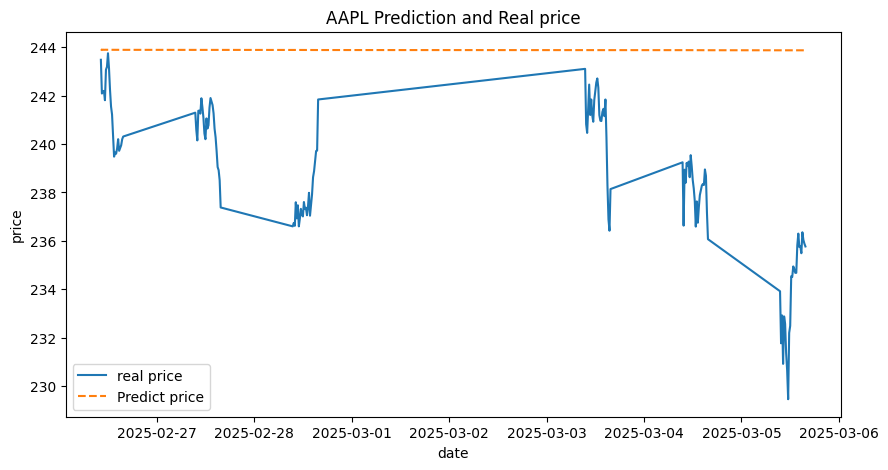


AMZN Finish the data prediction
Predict data samples:
date
2025-02-26 10:15:00    216.778009
2025-02-26 10:30:00    216.774816
2025-02-26 10:45:00    216.771529
2025-02-26 11:00:00    216.768235
2025-02-26 11:15:00    216.764941
                          ...    
2025-03-05 14:45:00    216.291030
2025-03-05 15:00:00    216.287742
2025-03-05 15:15:00    216.284455
2025-03-05 15:30:00    216.281168
2025-03-05 15:45:00    216.277880
Name: predicted_mean, Length: 153, dtype: float64


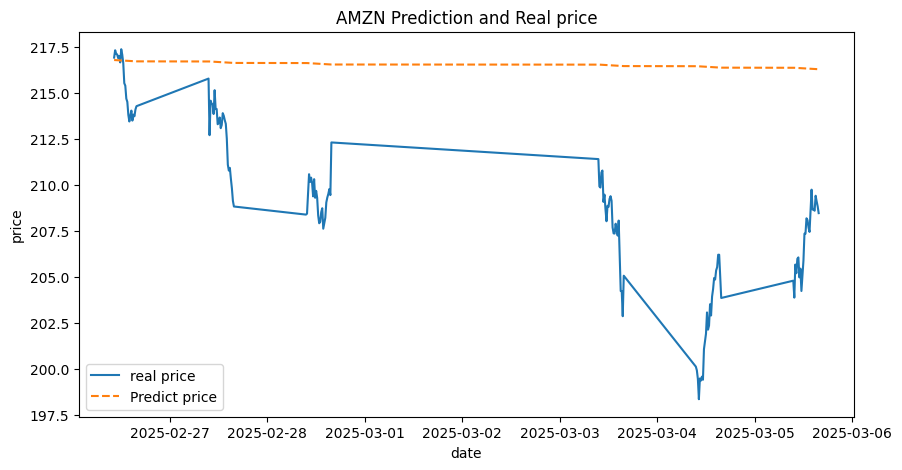


GOOG Finish the data prediction
Predict data samples:
date
2025-02-26 10:15:00    177.366185
2025-02-26 10:30:00    177.392259
2025-02-26 10:45:00    177.370300
2025-02-26 11:00:00    177.394588
2025-02-26 11:15:00    177.374349
                          ...    
2025-03-05 14:45:00    177.615941
2025-03-05 15:00:00    177.617636
2025-03-05 15:15:00    177.619154
2025-03-05 15:30:00    177.620842
2025-03-05 15:45:00    177.622366
Name: predicted_mean, Length: 153, dtype: float64


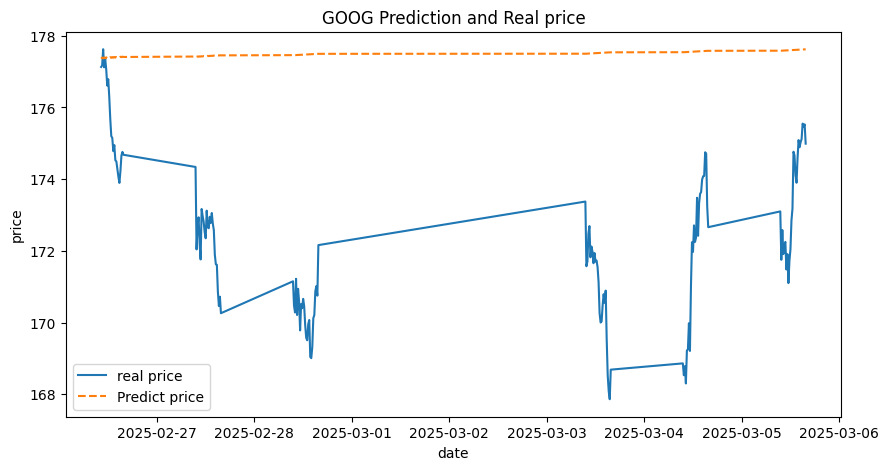


META Finish the data prediction
Predict data samples:
date
2025-02-26 10:15:00    675.683866
2025-02-26 10:30:00    675.657887
2025-02-26 10:45:00    675.752728
2025-02-26 11:00:00    675.774688
2025-02-26 11:15:00    675.840622
                          ...    
2025-03-05 14:45:00    682.984204
2025-03-05 15:00:00    683.034119
2025-03-05 15:15:00    683.084037
2025-03-05 15:30:00    683.133960
2025-03-05 15:45:00    683.183886
Name: predicted_mean, Length: 153, dtype: float64


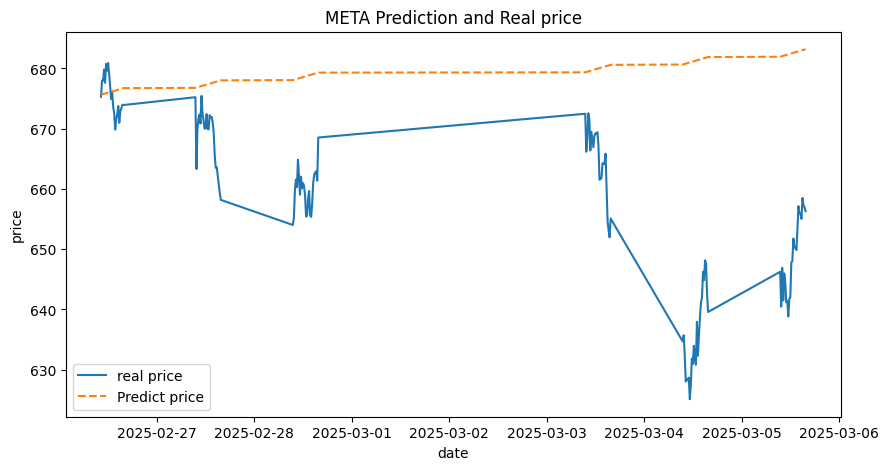


MSFT Finish the data prediction
Predict data samples:
date
2025-02-26 10:15:00    401.582914
2025-02-26 10:30:00    401.555996
2025-02-26 10:45:00    401.527543
2025-02-26 11:00:00    401.498602
2025-02-26 11:15:00    401.469506
                          ...    
2025-03-05 14:45:00    397.291271
2025-03-05 15:00:00    397.262408
2025-03-05 15:15:00    397.233547
2025-03-05 15:30:00    397.204688
2025-03-05 15:45:00    397.175831
Name: predicted_mean, Length: 153, dtype: float64


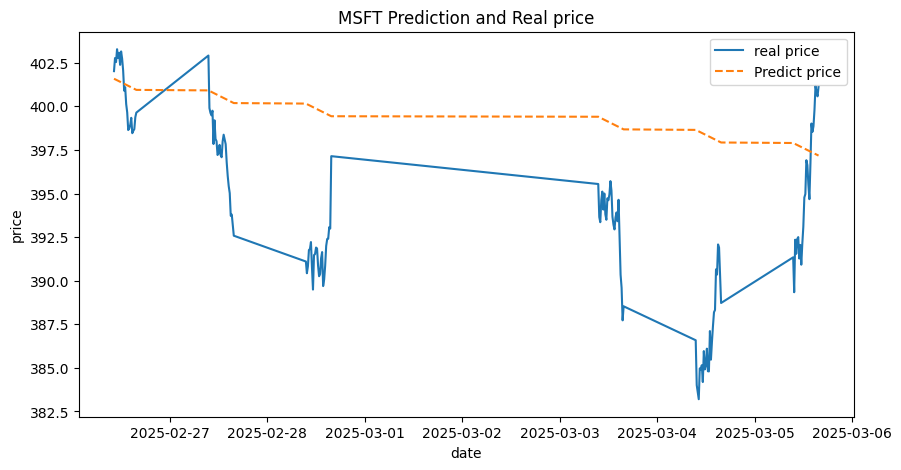


NVDA Finish the data prediction
Predict data samples:
date
2025-02-26 10:15:00    130.860575
2025-02-26 10:30:00    130.854187
2025-02-26 10:45:00    130.842833
2025-02-26 11:00:00    130.833372
2025-02-26 11:15:00    130.823190
                          ...    
2025-03-05 14:45:00    129.393692
2025-03-05 15:00:00    129.383820
2025-03-05 15:15:00    129.373948
2025-03-05 15:30:00    129.364077
2025-03-05 15:45:00    129.354206
Name: predicted_mean, Length: 153, dtype: float64


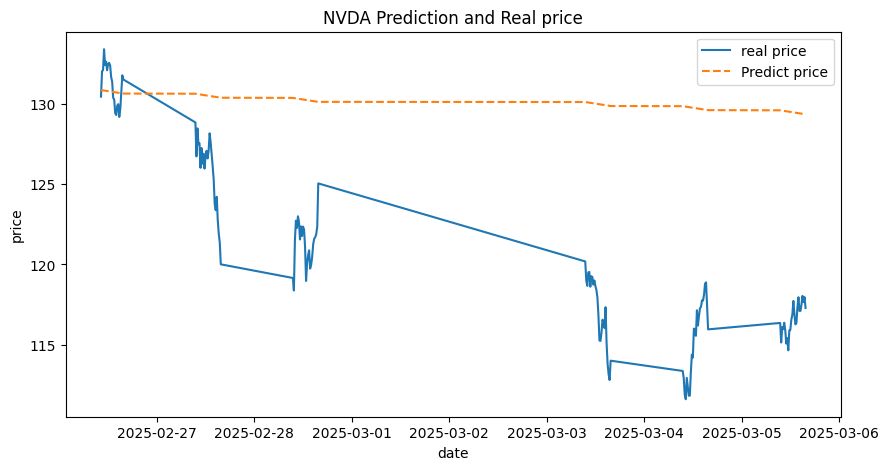


TSLA Finish the data prediction
Predict data samples:
date
2025-02-26 10:15:00    306.951530
2025-02-26 10:30:00    306.891793
2025-02-26 10:45:00    306.855039
2025-02-26 11:00:00    306.809673
2025-02-26 11:15:00    306.767545
                          ...    
2025-03-05 14:45:00    300.636523
2025-03-05 15:00:00    300.594380
2025-03-05 15:15:00    300.552242
2025-03-05 15:30:00    300.510110
2025-03-05 15:45:00    300.467984
Name: predicted_mean, Length: 153, dtype: float64


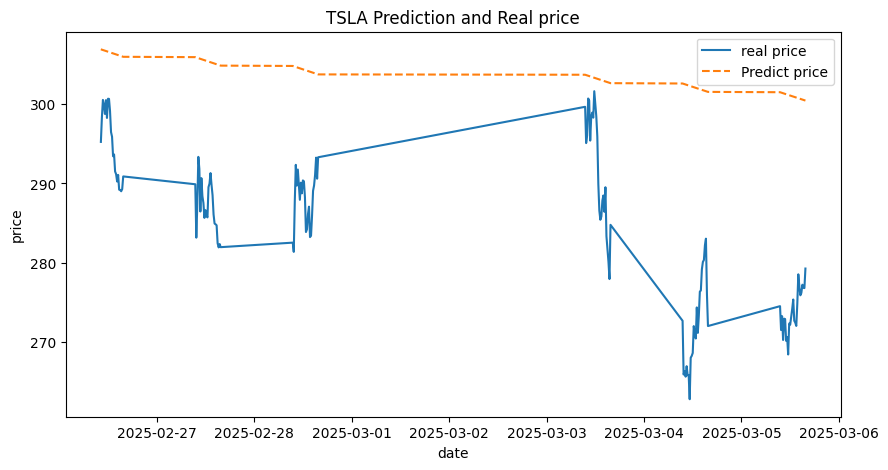

In [56]:

final_predictions = {}

for stock, forecast_diff in forecast_results.items():
    # 获取原始对数数据与训练数据
    close_log, _ = log_diff_data[stock]
    train_data, val_data = train_val_data[stock]

    forecast_diff.index = val_data.index

    # 还原对数数据：使用训练集最后一个对数值作为起点，加上预测差分的累积和
    last_train_log = close_log.loc[train_data.index[-1]]
    forecast_log = last_train_log + forecast_diff.cumsum()

    # 还原到价格数据
    forecast_price = np.exp(forecast_log)
    final_predictions[stock] = forecast_price

    print(f"\n{stock} Finish the data prediction")
    print("Predict data samples:")
    print(forecast_price)

    # 只选择验证集对应时间段内的真实价格进行对比
    actual_price = stock_data[stock]['close'].loc[forecast_price.index[0]:]

    plt.figure(figsize=(10, 5))
    plt.plot(actual_price, label='real price')
    plt.plot(forecast_price, label='Predict price', linestyle='--')
    plt.title(f"{stock} Prediction and Real price")
    plt.xlabel("date")
    plt.ylabel("price")
    plt.legend()
    plt.show()

In [55]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_results = {}
f1_results = {}

for stock, forecast_price in final_predictions.items():
    # 获取真实价格（验证集）
    actual_price = stock_data[stock]['close'].loc[forecast_price.index]

    # 计算实际趋势：当前价格 vs 之前价格
    actual_trend = (actual_price.diff() > 0).astype(int).dropna()
    predicted_trend = (forecast_price.diff() > 0).astype(int).dropna()

    # 对齐索引，避免索引错位
    actual_trend, predicted_trend = actual_trend.align(predicted_trend, join='inner')

    # 计算 Accuracy 和 F1 Score
    accuracy = accuracy_score(actual_trend, predicted_trend)
    f1 = f1_score(actual_trend, predicted_trend)

    accuracy_results[stock] = accuracy
    f1_results[stock] = f1

    print(f"{stock} Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

AAPL Accuracy: 0.5359, F1 Score: 0.0533
AMZN Accuracy: 0.5425, F1 Score: 0.0000
GOOG Accuracy: 0.5752, F1 Score: 0.6561
META Accuracy: 0.4771, F1 Score: 0.6429
MSFT Accuracy: 0.5098, F1 Score: 0.0000
NVDA Accuracy: 0.5294, F1 Score: 0.0000
TSLA Accuracy: 0.5294, F1 Score: 0.0000
